## House Prices - Advanced Regression Techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting

#### Problem Statement : 

- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad.
- But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
pd.set_option('max_colwidth', 600)



In [96]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

plt.rcParams['figure.figsize'] = (15, 10)

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
plt.rc('axes', labelsize=12)

### Data Description : 

            MSSubClass: Identifies the type of dwelling involved in the sale.	

                    20	1-STORY 1946 & NEWER ALL STYLES
                    30	1-STORY 1945 & OLDER
                    40	1-STORY W/FINISHED ATTIC ALL AGES
                    45	1-1/2 STORY - UNFINISHED ALL AGES
                    50	1-1/2 STORY FINISHED ALL AGES
                    60	2-STORY 1946 & NEWER
                    70	2-STORY 1945 & OLDER
                    75	2-1/2 STORY ALL AGES
                    80	SPLIT OR MULTI-LEVEL
                    85	SPLIT FOYER
                    90	DUPLEX - ALL STYLES AND AGES
                   120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
                   150	1-1/2 STORY PUD - ALL AGES
                   160	2-STORY PUD - 1946 & NEWER
                   180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
                   190	2 FAMILY CONVERSION - ALL STYLES AND AGES

            MSZoning: Identifies the general zoning classification of the sale.

                   A	Agriculture
                   C	Commercial
                   FV	Floating Village Residential
                   I	Industrial
                   RH	Residential High Density
                   RL	Residential Low Density
                   RP	Residential Low Density Park 
                   RM	Residential Medium Density

            LotFrontage: Linear feet of street connected to property

            LotArea: Lot size in square feet

            Street: Type of road access to property

                   Grvl	Gravel	
                   Pave	Paved

            Alley: Type of alley access to property

                   Grvl	Gravel
                   Pave	Paved
                   NA 	No alley access

            LotShape: General shape of property

                   Reg	Regular	
                   IR1	Slightly irregular
                   IR2	Moderately Irregular
                   IR3	Irregular

            LandContour: Flatness of the property

                   Lvl	Near Flat/Level	
                   Bnk	Banked - Quick and significant rise from street grade to building
                   HLS	Hillside - Significant slope from side to side
                   Low	Depression

            Utilities: Type of utilities available

                   AllPub	All public Utilities (E,G,W,& S)	
                   NoSewr	Electricity, Gas, and Water (Septic Tank)
                   NoSeWa	Electricity and Gas Only
                   ELO	Electricity only	

            LotConfig: Lot configuration

                   Inside	Inside lot
                   Corner	Corner lot
                   CulDSac	Cul-de-sac
                   FR2	Frontage on 2 sides of property
                   FR3	Frontage on 3 sides of property

            LandSlope: Slope of property

                   Gtl	Gentle slope
                   Mod	Moderate Slope	
                   Sev	Severe Slope

            Neighborhood: Physical locations within Ames city limits

                   Blmngtn	Bloomington Heights
                   Blueste	Bluestem
                   BrDale	Briardale
                   BrkSide	Brookside
                   ClearCr	Clear Creek
                   CollgCr	College Creek
                   Crawfor	Crawford
                   Edwards	Edwards
                   Gilbert	Gilbert
                   IDOTRR	Iowa DOT and Rail Road
                   MeadowV	Meadow Village
                   Mitchel	Mitchell
                   Names	North Ames
                   NoRidge	Northridge
                   NPkVill	Northpark Villa
                   NridgHt	Northridge Heights
                   NWAmes	Northwest Ames
                   OldTown	Old Town
                   SWISU	South & West of Iowa State University
                   Sawyer	Sawyer
                   SawyerW	Sawyer West
                   Somerst	Somerset
                   StoneBr	Stone Brook
                   Timber	Timberland
                   Veenker	Veenker

            Condition1: Proximity to various conditions

                   Artery	Adjacent to arterial street
                   Feedr	Adjacent to feeder street	
                   Norm	Normal	
                   RRNn	Within 200' of North-South Railroad
                   RRAn	Adjacent to North-South Railroad
                   PosN	Near positive off-site feature--park, greenbelt, etc.
                   PosA	Adjacent to postive off-site feature
                   RRNe	Within 200' of East-West Railroad
                   RRAe	Adjacent to East-West Railroad

            Condition2: Proximity to various conditions (if more than one is present)

                   Artery	Adjacent to arterial street
                   Feedr	Adjacent to feeder street	
                   Norm	Normal	
                   RRNn	Within 200' of North-South Railroad
                   RRAn	Adjacent to North-South Railroad
                   PosN	Near positive off-site feature--park, greenbelt, etc.
                   PosA	Adjacent to postive off-site feature
                   RRNe	Within 200' of East-West Railroad
                   RRAe	Adjacent to East-West Railroad

            BldgType: Type of dwelling

                   1Fam	Single-family Detached	
                   2FmCon	Two-family Conversion; originally built as one-family dwelling
                   Duplx	Duplex
                   TwnhsE	Townhouse End Unit
                   TwnhsI	Townhouse Inside Unit

            HouseStyle: Style of dwelling

                   1Story	One story
                   1.5Fin	One and one-half story: 2nd level finished
                   1.5Unf	One and one-half story: 2nd level unfinished
                   2Story	Two story
                   2.5Fin	Two and one-half story: 2nd level finished
                   2.5Unf	Two and one-half story: 2nd level unfinished
                   SFoyer	Split Foyer
                   SLvl	Split Level

            OverallQual: Rates the overall material and finish of the house

                   10	Very Excellent
                   9	Excellent
                   8	Very Good
                   7	Good
                   6	Above Average
                   5	Average
                   4	Below Average
                   3	Fair
                   2	Poor
                   1	Very Poor

            OverallCond: Rates the overall condition of the house

                   10	Very Excellent
                   9	Excellent
                   8	Very Good
                   7	Good
                   6	Above Average	
                   5	Average
                   4	Below Average	
                   3	Fair
                   2	Poor
                   1	Very Poor

            YearBuilt: Original construction date

            YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

            RoofStyle: Type of roof

                   Flat	Flat
                   Gable	Gable
                   Gambrel	Gabrel (Barn)
                   Hip	Hip
                   Mansard	Mansard
                   Shed	Shed

            RoofMatl: Roof material

                   ClyTile	Clay or Tile
                   CompShg	Standard (Composite) Shingle
                   Membran	Membrane
                   Metal	Metal
                   Roll	Roll
                   Tar&Grv	Gravel & Tar
                   WdShake	Wood Shakes
                   WdShngl	Wood Shingles

            Exterior1st: Exterior covering on house

                   AsbShng	Asbestos Shingles
                   AsphShn	Asphalt Shingles
                   BrkComm	Brick Common
                   BrkFace	Brick Face
                   CBlock	Cinder Block
                   CemntBd	Cement Board
                   HdBoard	Hard Board
                   ImStucc	Imitation Stucco
                   MetalSd	Metal Siding
                   Other	Other
                   Plywood	Plywood
                   PreCast	PreCast	
                   Stone	Stone
                   Stucco	Stucco
                   VinylSd	Vinyl Siding
                   Wd Sdng	Wood Siding
                   WdShing	Wood Shingles

            Exterior2nd: Exterior covering on house (if more than one material)

                   AsbShng	Asbestos Shingles
                   AsphShn	Asphalt Shingles
                   BrkComm	Brick Common
                   BrkFace	Brick Face
                   CBlock	Cinder Block
                   CemntBd	Cement Board
                   HdBoard	Hard Board
                   ImStucc	Imitation Stucco
                   MetalSd	Metal Siding
                   Other	Other
                   Plywood	Plywood
                   PreCast	PreCast
                   Stone	Stone
                   Stucco	Stucco
                   VinylSd	Vinyl Siding
                   Wd Sdng	Wood Siding
                   WdShing	Wood Shingles

            MasVnrType: Masonry veneer type

                   BrkCmn	Brick Common
                   BrkFace	Brick Face
                   CBlock	Cinder Block
                   None	None
                   Stone	Stone

            MasVnrArea: Masonry veneer area in square feet

            ExterQual: Evaluates the quality of the material on the exterior 

                   Ex	Excellent
                   Gd	Good
                   TA	Average/Typical
                   Fa	Fair
                   Po	Poor

            ExterCond: Evaluates the present condition of the material on the exterior

                   Ex	Excellent
                   Gd	Good
                   TA	Average/Typical
                   Fa	Fair
                   Po	Poor

            Foundation: Type of foundation

                   BrkTil	Brick & Tile
                   CBlock	Cinder Block
                   PConc	Poured Contrete	
                   Slab	Slab
                   Stone	Stone
                   Wood	Wood

            BsmtQual: Evaluates the height of the basement

                   Ex	Excellent (100+ inches)	
                   Gd	Good (90-99 inches)
                   TA	Typical (80-89 inches)
                   Fa	Fair (70-79 inches)
                   Po	Poor (<70 inches
                   NA	No Basement

            BsmtCond: Evaluates the general condition of the basement

                   Ex	Excellent
                   Gd	Good
                   TA	Typical - slight dampness allowed
                   Fa	Fair - dampness or some cracking or settling
                   Po	Poor - Severe cracking, settling, or wetness
                   NA	No Basement

            BsmtExposure: Refers to walkout or garden level walls

                   Gd	Good Exposure
                   Av	Average Exposure (split levels or foyers typically score average or above)	
                   Mn	Mimimum Exposure
                   No	No Exposure
                   NA	No Basement

            BsmtFinType1: Rating of basement finished area

                   GLQ	Good Living Quarters
                   ALQ	Average Living Quarters
                   BLQ	Below Average Living Quarters	
                   Rec	Average Rec Room
                   LwQ	Low Quality
                   Unf	Unfinshed
                   NA	No Basement

            BsmtFinSF1: Type 1 finished square feet

            BsmtFinType2: Rating of basement finished area (if multiple types)

                   GLQ	Good Living Quarters
                   ALQ	Average Living Quarters
                   BLQ	Below Average Living Quarters	
                   Rec	Average Rec Room
                   LwQ	Low Quality
                   Unf	Unfinshed
                   NA	No Basement

            BsmtFinSF2: Type 2 finished square feet

            BsmtUnfSF: Unfinished square feet of basement area

            TotalBsmtSF: Total square feet of basement area

            Heating: Type of heating

                   Floor	Floor Furnace
                   GasA	Gas forced warm air furnace
                   GasW	Gas hot water or steam heat
                   Grav	Gravity furnace	
                   OthW	Hot water or steam heat other than gas
                   Wall	Wall furnace

            HeatingQC: Heating quality and condition

                   Ex	Excellent
                   Gd	Good
                   TA	Average/Typical
                   Fa	Fair
                   Po	Poor

            CentralAir: Central air conditioning

                   N	No
                   Y	Yes

            Electrical: Electrical system

                   SBrkr	Standard Circuit Breakers & Romex
                   FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
                   FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
                   FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
                   Mix	Mixed

            1stFlrSF: First Floor square feet

            2ndFlrSF: Second floor square feet

            LowQualFinSF: Low quality finished square feet (all floors)

            GrLivArea: Above grade (ground) living area square feet

            BsmtFullBath: Basement full bathrooms

            BsmtHalfBath: Basement half bathrooms

            FullBath: Full bathrooms above grade

            HalfBath: Half baths above grade

            Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

            Kitchen: Kitchens above grade

            KitchenQual: Kitchen quality

                   Ex	Excellent
                   Gd	Good
                   TA	Typical/Average
                   Fa	Fair
                   Po	Poor

            TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

            Functional: Home functionality (Assume typical unless deductions are warranted)

                   Typ	Typical Functionality
                   Min1	Minor Deductions 1
                   Min2	Minor Deductions 2
                   Mod	Moderate Deductions
                   Maj1	Major Deductions 1
                   Maj2	Major Deductions 2
                   Sev	Severely Damaged
                   Sal	Salvage only

            Fireplaces: Number of fireplaces

            FireplaceQu: Fireplace quality

                   Ex	Excellent - Exceptional Masonry Fireplace
                   Gd	Good - Masonry Fireplace in main level
                   TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
                   Fa	Fair - Prefabricated Fireplace in basement
                   Po	Poor - Ben Franklin Stove
                   NA	No Fireplace

            GarageType: Garage location

                   2Types	More than one type of garage
                   Attchd	Attached to home
                   Basment	Basement Garage
                   BuiltIn	Built-In (Garage part of house - typically has room above garage)
                   CarPort	Car Port
                   Detchd	Detached from home
                   NA	No Garage

            GarageYrBlt: Year garage was built

            GarageFinish: Interior finish of the garage

                   Fin	Finished
                   RFn	Rough Finished	
                   Unf	Unfinished
                   NA	No Garage

            GarageCars: Size of garage in car capacity

            GarageArea: Size of garage in square feet

            GarageQual: Garage quality

                   Ex	Excellent
                   Gd	Good
                   TA	Typical/Average
                   Fa	Fair
                   Po	Poor
                   NA	No Garage

            GarageCond: Garage condition

                   Ex	Excellent
                   Gd	Good
                   TA	Typical/Average
                   Fa	Fair
                   Po	Poor
                   NA	No Garage

            PavedDrive: Paved driveway

                   Y	Paved 
                   P	Partial Pavement
                   N	Dirt/Gravel

            WoodDeckSF: Wood deck area in square feet

            OpenPorchSF: Open porch area in square feet

            EnclosedPorch: Enclosed porch area in square feet

            3SsnPorch: Three season porch area in square feet

            ScreenPorch: Screen porch area in square feet

            PoolArea: Pool area in square feet

            PoolQC: Pool quality

                   Ex	Excellent
                   Gd	Good
                   TA	Average/Typical
                   Fa	Fair
                   NA	No Pool

            Fence: Fence quality

                   GdPrv	Good Privacy
                   MnPrv	Minimum Privacy
                   GdWo	Good Wood
                   MnWw	Minimum Wood/Wire
                   NA	No Fence

            MiscFeature: Miscellaneous feature not covered in other categories

                   Elev	Elevator
                   Gar2	2nd Garage (if not described in garage section)
                   Othr	Other
                   Shed	Shed (over 100 SF)
                   TenC	Tennis Court
                   NA	None

            MiscVal: Dollar Value of miscellaneous feature

            MoSold: Month Sold (MM)

            YrSold: Year Sold (YYYY)

            SaleType: Type of sale

                   WD 	Warranty Deed - Conventional
                   CWD	Warranty Deed - Cash
                   VWD	Warranty Deed - VA Loan
                   New	Home just constructed and sold
                   COD	Court Officer Deed/Estate
                   Con	Contract 15% Down payment regular terms
                   ConLw	Contract Low Down payment and low interest
                   ConLI	Contract Low Interest
                   ConLD	Contract Low Down
                   Oth	Other

            SaleCondition: Condition of sale

                   Normal	Normal Sale
                   Abnorml	Abnormal Sale -  trade, foreclosure, short sale
                   AdjLand	Adjoining Land Purchase
                   Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
                   Family	Sale between family members
                   Partial	Home was not completed when last assessed (associated with New Homes)


### Importing data : 

In [97]:
path = '/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/HousePricePrediciton_KaggleCompition_data/train.csv'
d_train = pd.read_csv(path)
d_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [98]:
path = '/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/HousePricePrediciton_KaggleCompition_data/test.csv'
d_test = pd.read_csv(path)
d_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [99]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [100]:
# d_train.dtypes

In [101]:
d_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [102]:
d_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [103]:
missing_values_status_train_data = ((d_train.isna().sum()  / len(d_train))).reset_index()

missing_values_status_train_data.columns = ["Feature","Number_of_Missing_values"]
missing_values_status_train_data["Missing_Values_in_%"] = missing_values_status_train_data["Number_of_Missing_values"] * 100
missing_values_status_train_data

,Feature,Number_of_Missing_values,Missing_Values_in_%
0,Id,0.000000,0.000000
1,MSSubClass,0.000000,0.000000
2,MSZoning,0.000000,0.000000
3,LotFrontage,0.177397,17.739726
4,LotArea,0.000000,0.000000
5,Street,0.000000,0.000000
6,Alley,0.937671,93.767123
7,LotShape,0.000000,0.000000
8,LandContour,0.000000,0.000000
9,Utilities,0.000000,0.000000


In [104]:
missing_values_status_test_data = ((d_test.isna().sum()  / len(d_test))).reset_index()

missing_values_status_test_data.columns = ["Feature","Number_of_Missing_values"]
missing_values_status_test_data["Missing_Values_in_%"] = missing_values_status_test_data["Number_of_Missing_values"] * 100
missing_values_status_test_data

,Feature,Number_of_Missing_values,Missing_Values_in_%
0,Id,0.000000,0.000000
1,MSSubClass,0.000000,0.000000
2,MSZoning,0.002742,0.274160
3,LotFrontage,0.155586,15.558602
4,LotArea,0.000000,0.000000
5,Street,0.000000,0.000000
6,Alley,0.926662,92.666210
7,LotShape,0.000000,0.000000
8,LandContour,0.000000,0.000000
9,Utilities,0.001371,0.137080


## Target Variable (House Sale Price) distribution : 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

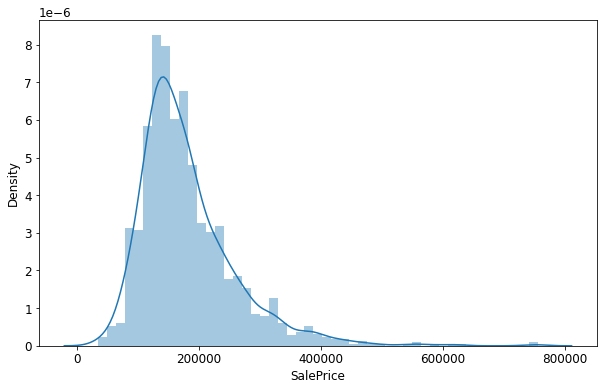

In [105]:
plt.rcParams['figure.figsize'] = (10, 6)

sns.distplot(d_train["SalePrice"])

<AxesSubplot:xlabel='SalePrice'>

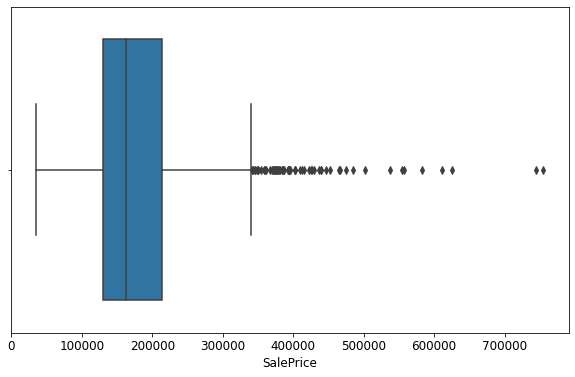

In [106]:
sns.boxplot(d_train["SalePrice"])

In [107]:
d_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [108]:
d_train.drop("Id",axis = 1, inplace=True)

In [109]:
d_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [110]:
"MSSubClass","MSZoning","Street",
"Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope",


('Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope')

In [111]:
features = d_train.nunique().reset_index().merge(d_train.dtypes.reset_index(), on ="index")

In [112]:
features.columns = ["Feature","Number_Of_Unique_values", "DataType"]

In [113]:
features = missing_values_status_train_data.merge(features, on = "Feature").drop("Number_of_Missing_values",axis = 1)

In [114]:
features

,Feature,Missing_Values_in_%,Number_Of_Unique_values,DataType
0,MSSubClass,0.000000,15,int64
1,MSZoning,0.000000,5,object
2,LotFrontage,17.739726,110,float64
3,LotArea,0.000000,1073,int64
4,Street,0.000000,2,object
5,Alley,93.767123,2,object
6,LotShape,0.000000,4,object
7,LandContour,0.000000,4,object
8,Utilities,0.000000,2,object
9,LotConfig,0.000000,5,object


In [115]:
full_na_others_categorical_features = features[(features.DataType == "object") & (features["Missing_Values_in_%"]	> 0.0) ].Feature.values

In [116]:
for f in full_na_others_categorical_features:
  d_train[f] = d_train[f].fillna("Others")

In [117]:
for f in full_na_others_categorical_features:
  d_test[f] = d_test[f].fillna("Others")

In [118]:
full_na_others_numeric_features = features[(features.DataType != "object") & (features["Missing_Values_in_%"]	> 0.0) ].Feature.values


In [119]:
full_na_others_numeric_features


array(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype=object)

In [120]:
missing_values_status_train_data = ((d_train.isna().sum()  / len(d_train))).reset_index()

missing_values_status_train_data.columns = ["Feature","Number_of_Missing_values"]
missing_values_status_train_data["Missing_Values_in_%"] = missing_values_status_train_data["Number_of_Missing_values"] * 100
missing_values_status_train_data

features = d_train.nunique().reset_index().merge(d_train.dtypes.reset_index(), on ="index")
features.columns = ["Feature","Number_Of_Unique_values", "DataType"]

features = missing_values_status_train_data.merge(features, on = "Feature").drop("Number_of_Missing_values",axis = 1)

In [121]:
features

,Feature,Missing_Values_in_%,Number_Of_Unique_values,DataType
0,MSSubClass,0.000000,15,int64
1,MSZoning,0.000000,5,object
2,LotFrontage,17.739726,110,float64
3,LotArea,0.000000,1073,int64
4,Street,0.000000,2,object
5,Alley,0.000000,3,object
6,LotShape,0.000000,4,object
7,LandContour,0.000000,4,object
8,Utilities,0.000000,2,object
9,LotConfig,0.000000,5,object


# Encoding

In [122]:
categorical_featrues = features[features.DataType == "object"]["Feature"].values

In [123]:
for feature in categorical_featrues:
  d_train[feature] = d_train.groupby(feature)["SalePrice"].transform("median")
  d_test[feature] = d_train.groupby(feature)["SalePrice"].transform("median")

In [124]:
# d_train.isna().sum()

In [125]:
# d_test.isna().sum()

In [126]:
d_test.drop("Id",axis = 1,inplace=True)

In [127]:
d_train['MSSubClass'] = d_train.groupby('MSSubClass')["SalePrice"].transform("median")
d_test['MSSubClass'] = d_train.groupby('MSSubClass')["SalePrice"].transform("median")

In [128]:
# d_train['GarageYrBlt'] = d_train.groupby('GarageYrBlt')["SalePrice"].transform("median")
# d_test['GarageYrBlt'] = d_train.groupby('GarageYrBlt')["SalePrice"].transform("median")

In [129]:
missing_vals = d_train.isna().sum().reset_index().merge(d_test.isna().sum().reset_index(), on = "index")
missing_vals.columns = ["feature","train_data_missing","test_data_missing"]
missing_vals.loc[(missing_vals.train_data_missing > 0) | (missing_vals.test_data_missing > 0)]

,feature,train_data_missing,test_data_missing
2,LotFrontage,259,227
25,MasVnrArea,8,15
33,BsmtFinSF1,0,1
35,BsmtFinSF2,0,1
36,BsmtUnfSF,0,1
37,TotalBsmtSF,0,1
46,BsmtFullBath,0,2
47,BsmtHalfBath,0,2
58,GarageYrBlt,81,78
60,GarageCars,0,1


In [131]:
d_train.LotFrontage = d_train.LotFrontage.fillna(d_train.LotFrontage.mean())
d_test.LotFrontage = d_test.LotFrontage.fillna(d_train.LotFrontage.mean())

In [132]:
d_train.MasVnrArea = d_train.MasVnrArea.fillna(d_train.MasVnrArea.mean())
d_test.MasVnrArea = d_test.MasVnrArea.fillna(d_train.MasVnrArea.mean())

In [133]:
d_train.BsmtFinSF1 = d_train.BsmtFinSF1.fillna(d_train.BsmtFinSF1.mean())
d_test.BsmtFinSF1 = d_test.BsmtFinSF1.fillna(d_train.BsmtFinSF1.mean())

In [134]:
d_train.BsmtFinSF2 = d_train.BsmtFinSF2.fillna(0)
d_test.BsmtFinSF2 = d_test.BsmtFinSF2.fillna(0)

In [135]:
d_train.BsmtFullBath = d_train.BsmtFullBath.fillna(0)
d_test.BsmtFullBath = d_test.BsmtFullBath.fillna(0)


In [136]:
d_train.BsmtHalfBath = d_train.BsmtHalfBath.fillna(0)
d_test.BsmtHalfBath = d_test.BsmtHalfBath.fillna(0)

In [137]:
d_train.BsmtUnfSF = d_train.BsmtUnfSF.fillna(d_train.BsmtUnfSF.mean())
d_test.BsmtUnfSF = d_test.BsmtUnfSF.fillna(d_train.BsmtUnfSF.mean())

In [138]:

d_train.TotalBsmtSF = d_train.TotalBsmtSF.fillna(d_train.TotalBsmtSF.mean())
d_test.TotalBsmtSF = d_test.TotalBsmtSF.fillna(d_train.TotalBsmtSF.mean())

In [139]:
d_train.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [140]:
d_train.GarageCars = d_train.GarageCars.fillna(2)
d_test.GarageCars = d_test.GarageCars.fillna(2)

In [141]:


d_train.GarageArea = d_train.GarageArea.fillna(d_train.GarageArea.mean())
d_test.GarageArea = d_test.GarageArea.fillna(d_train.GarageArea.mean())

In [142]:
d_train.drop(["GarageYrBlt"],axis= 1,inplace=True)
d_test.drop(["GarageYrBlt"],axis= 1,inplace=True)

In [143]:
missing_vals = d_train.isna().sum().reset_index().merge(d_test.isna().sum().reset_index(), on = "index")
missing_vals.columns = ["feature","train_data_missing","test_data_missing"]
missing_vals.loc[(missing_vals.train_data_missing > 0) | (missing_vals.test_data_missing > 0)]

,feature,train_data_missing,test_data_missing


In [151]:
X = d_train.drop(["SalePrice"],axis = 1)
y = d_train.SalePrice

In [155]:
from sklearn.model_selection import train_test_split
X_train , X_test,  y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 45)

In [161]:
X_train.shape , X_test.shape,  y_train.shape , y_test.shape

((1168, 78), (292, 78), (1168,), (292,))

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [162]:
scaler.fit(X_train)

StandardScaler()

In [163]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
d_test = scaler.transform(d_test)

In [164]:
X_train.shape, X_test.shape, d_test.shape

((1168, 78), (292, 78), (1459, 78))

In [208]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 1000,
                           max_depth = 5)

In [209]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=800)

In [210]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [211]:
from sklearn.model_selection import cross_val_score, cross_validate

In [212]:
cross_validate(estimator = RF,
                X=X_train,
                y=y_train,
                scoring = "r2",
                cv = 5, 
                return_train_score=True
              )

{'fit_time': array([6.44221473, 4.86123204, 6.16970253, 4.79267788, 5.65170622]),
 'score_time': array([0.06283784, 0.06269789, 0.06505561, 0.06441045, 0.10296845]),
 'test_score': array([0.85283661, 0.52467918, 0.81670439, 0.85659607, 0.83303548]),
 'train_score': array([0.92261532, 0.93304128, 0.91633265, 0.92073707, 0.91805492])}

In [228]:
RF = RandomForestRegressor(n_estimators = 2000,
                           max_depth = 5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=2000)

In [229]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)


In [230]:
r2_score(y_train , y_train_pred),r2_score(y_test , y_test_pred)

(0.9150242363352099, 0.8480976833005491)

In [231]:
mean_absolute_percentage_error(y_train , y_train_pred) * 100 ,mean_absolute_percentage_error(y_test , y_test_pred)* 100

(10.192765388565968, 14.050129747992134)

In [239]:
X_train.shape[1]

78

# NN

In [235]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [269]:
model = Sequential([
    
  Dense(4,activation = tf.keras.activations.relu,
         kernel_initializer='glorot_uniform',
        input_shape = (X_train.shape[1],),
        name = "H1"),
  Dense(8,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H2"),
  Dense(16,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H3"),
  Dense(32,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H4"),
  Dense(64,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H4_1"),        
  Dense(32,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H4_2"),
  Dense(16,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H5"),
  Dense(8,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H6"),
  Dense(4,activation = tf.keras.activations.relu, 
        kernel_initializer='glorot_uniform',
        name = "H7"),
  Dense(1),
])

In [270]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H1 (Dense)                  (None, 4)                 316       
                                                                 
 H2 (Dense)                  (None, 8)                 40        
                                                                 
 H3 (Dense)                  (None, 16)                144       
                                                                 
 H4 (Dense)                  (None, 32)                544       
                                                                 
 H4_1 (Dense)                (None, 64)                2112      
                                                                 
 H4_2 (Dense)                (None, 32)                2080      
                                                                 
 H5 (Dense)                  (None, 16)               

In [271]:
for params in model.weights:
  print(params.shape)

(78, 4)
(4,)
(4, 8)
(8,)
(8, 16)
(16,)
(16, 32)
(32,)
(32, 64)
(64,)
(64, 32)
(32,)
(32, 16)
(16,)
(16, 8)
(8,)
(8, 4)
(4,)
(4, 1)
(1,)


In [272]:
model.compile(
    
    optimizer= tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.MSE, 
    metrics= [tf.keras.metrics.MeanAbsolutePercentageError()]

)

In [273]:
model.fit( X_train,
          y_train,batch_size = 32,
          validation_split = 0.2,
          epochs = 500
          )

Epoch 1/100
30/30 [==============================] - 2s 11ms/step - loss: 38723088384.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 39646261248.0000 - val_mean_absolute_percentage_error: 99.9999
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 38722977792.0000 - mean_absolute_percentage_error: 99.9998 - val_loss: 39645827072.0000 - val_mean_absolute_percentage_error: 99.9994
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 38720208896.0000 - mean_absolute_percentage_error: 99.9967 - val_loss: 39634456576.0000 - val_mean_absolute_percentage_error: 99.9871
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 38650888192.0000 - mean_absolute_percentage_error: 99.9278 - val_loss: 39404261376.0000 - val_mean_absolute_percentage_error: 99.7415
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 37611995136.0000 - mean_absolute_percentage_error: 98.8454 - val_loss: 36379586560.0000 - val_mea